In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [2]:
with open("oc20_data_mapping.pkl", "rb") as input_file:
    mappings = pickle.load(input_file)
with open("mapping_adslab_slab.pkl", "rb") as input_file:
    slab_adslab_mappings = pickle.load(input_file)

In [3]:
df_200k = pd.read_csv("s2ef_200k_ads_energies_forces_slab.csv")
df_200k["total_energy_conv_errors"] = df_200k["new_total_energies"] - df_200k["old_total_energies"]
df_200k["ref_energy_conv_errors"] = df_200k["new_ads_energies"] - df_200k["old_ads_energies"]

In [4]:
material_classes = []
surfaces = []
adsorbates = []
for sid in tqdm(df_200k["sid"]):
    material_classes.append(mappings[sid]["class"])
    surfaces.append(mappings[sid]["bulk_symbols"])
    adsorbates.append(mappings[sid]["ads_symbols"])
material_classes = np.array(material_classes)
# add system information to the dataframe
df_200k["cat_class"] = material_classes
df_200k["bulk_symbols"] = surfaces
df_200k["ads_symbols"] = adsorbates

  0%|          | 0/186735 [00:00<?, ?it/s]

100%|██████████| 186735/186735 [00:00<00:00, 444791.63it/s]


In [5]:
df_200k["total_energy_conv_errors"] = df_200k["new_total_energies"] - df_200k["old_total_energies"]
df_200k["slab_energy_conv_errors"] = df_200k["new_slab_energies"] - df_200k["old_slab_energies"]
df_200k["ref_energy_conv_errors"] = df_200k["new_ads_energies"] - df_200k["old_ads_energies"]

total_energy_maes = {"Intermetallics":df_200k.query("cat_class==0")["total_energy_conv_errors"], 
              "Metalloids":df_200k.query("cat_class==1")["total_energy_conv_errors"],
               "Non-metals":df_200k.query("cat_class==2")["total_energy_conv_errors"],
               "Halides":df_200k.query("cat_class==3")["total_energy_conv_errors"],
              }

slab_energy_maes = {"Intermetallics":df_200k.query("cat_class==0")["slab_energy_conv_errors"], 
              "Metalloids":df_200k.query("cat_class==1")["slab_energy_conv_errors"],
               "Non-metals":df_200k.query("cat_class==2")["slab_energy_conv_errors"],
               "Halides":df_200k.query("cat_class==3")["slab_energy_conv_errors"],
              }

ref_energy_maes = {"Intermetallics":df_200k.query("cat_class==0")["ref_energy_conv_errors"], 
              "Metalloids":df_200k.query("cat_class==1")["ref_energy_conv_errors"],
               "Non-metals":df_200k.query("cat_class==2")["ref_energy_conv_errors"],
               "Halides":df_200k.query("cat_class==3")["ref_energy_conv_errors"],
              }

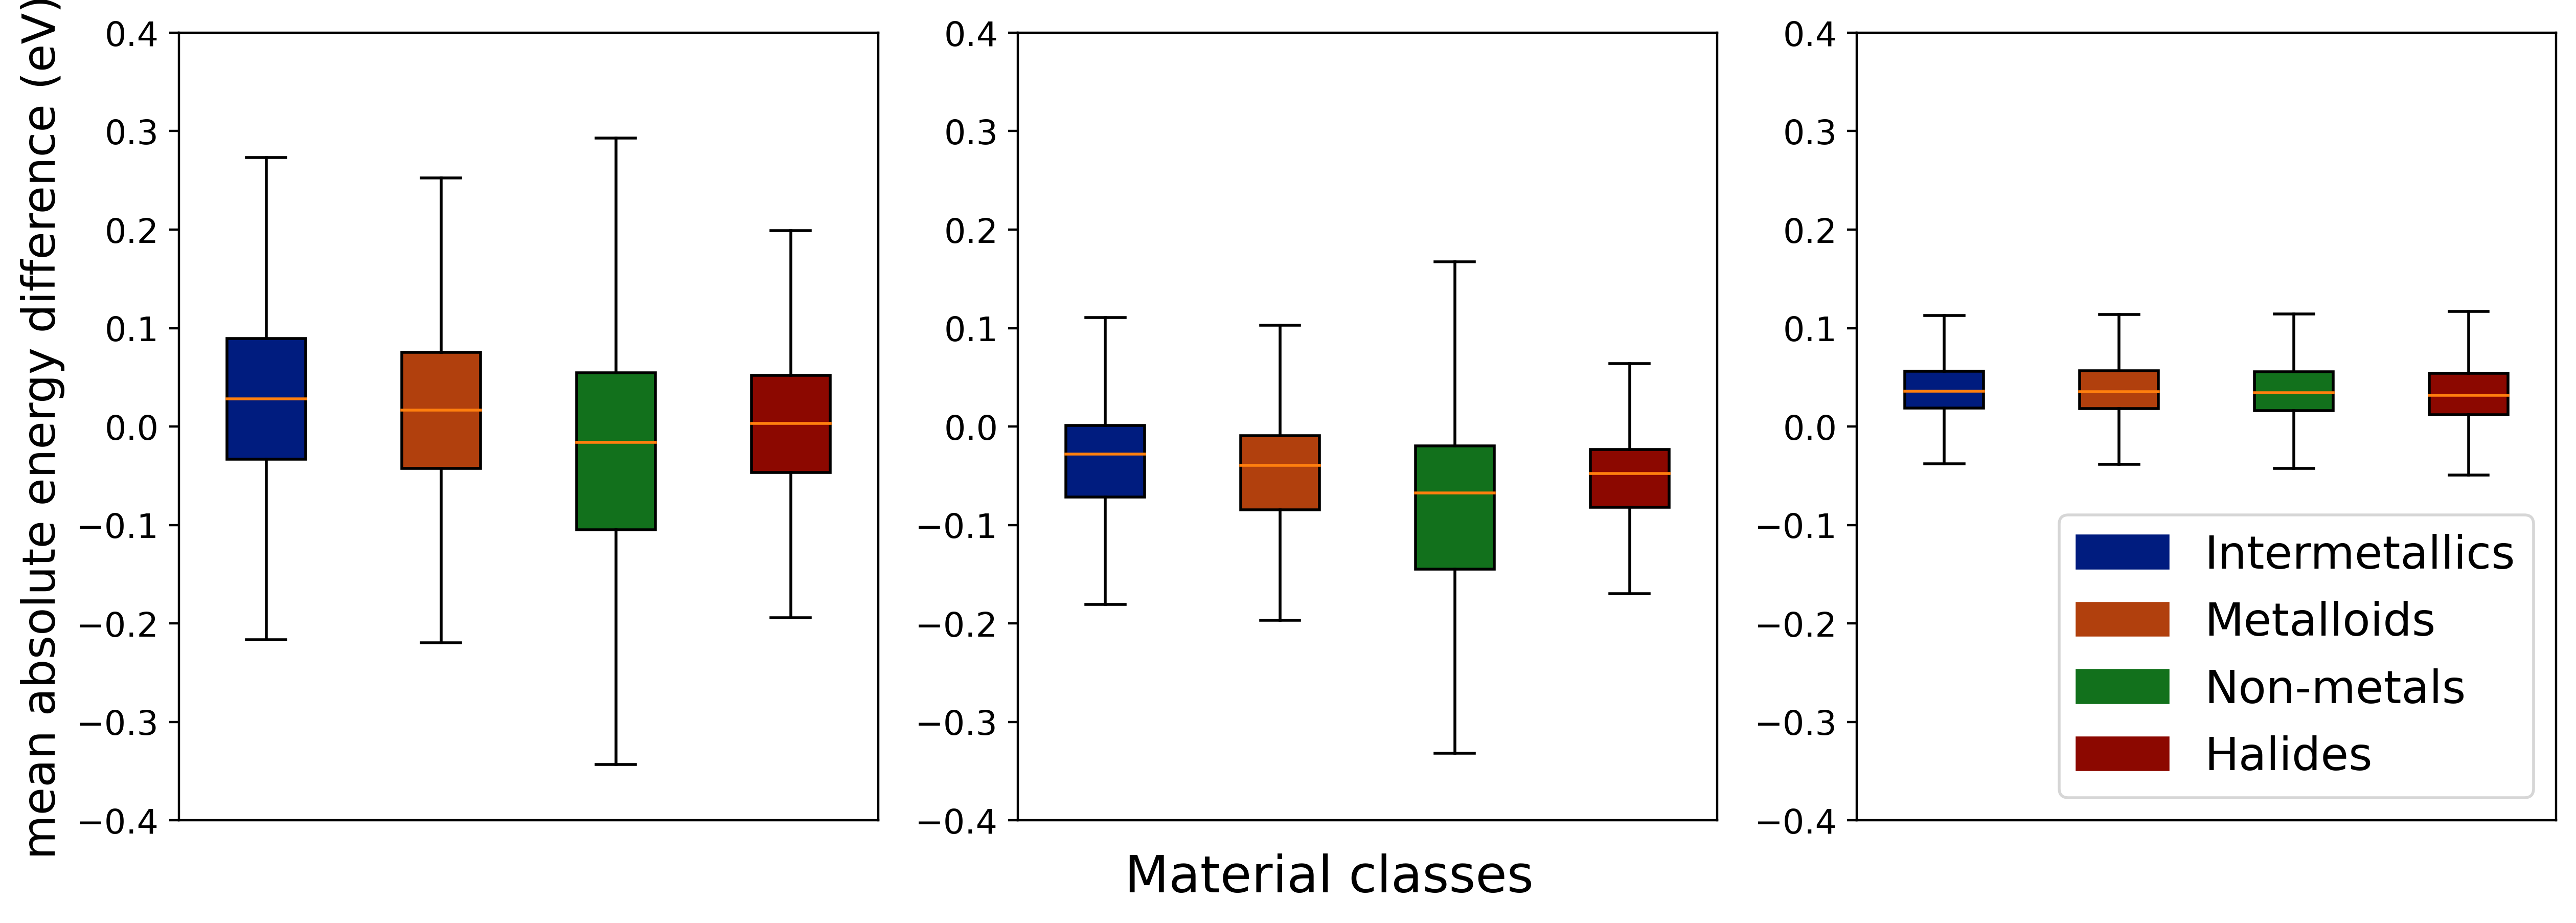

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, dpi=400)

colors = {'Intermetallics': '#001c7f', 'Metalloids': '#b1400d', 'Non-metals':  '#12711c', 'Halides': '#8c0800'}

for ax, energy_maes in zip([ax1, ax2, ax3], [total_energy_maes, slab_energy_maes, ref_energy_maes]):
    data = [energy_maes[key] for key in energy_maes.keys()]
    box = ax.boxplot(data, patch_artist=True, showfliers=False)
    for patch, color in zip(box['boxes'], [colors[category] for category in energy_maes.keys()]):
        patch.set_facecolor(color)

# ax1.set_ylim(-0.3,0.3)  # Adjust the y-limit as per your data range

for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_ylim(-0.4,0.4)
    # ax.set_yticks([0, 0.3, 0.6, 0.9, 1.2])  # Adjust the y-ticks as per your data range

ax1.set_ylabel("mean absolute energy difference (eV)", fontsize=16)

# Create custom legend
legend_colors = [plt.Rectangle((0, 0), 1, 1, color=colors[key]) for key in total_energy_maes.keys()]
plt.legend(legend_colors, total_energy_maes.keys(), loc='lower right', fontsize=16)
fig.text(0.5, 0.04, 'Material classes', ha='center', fontsize=18)

plt.show()


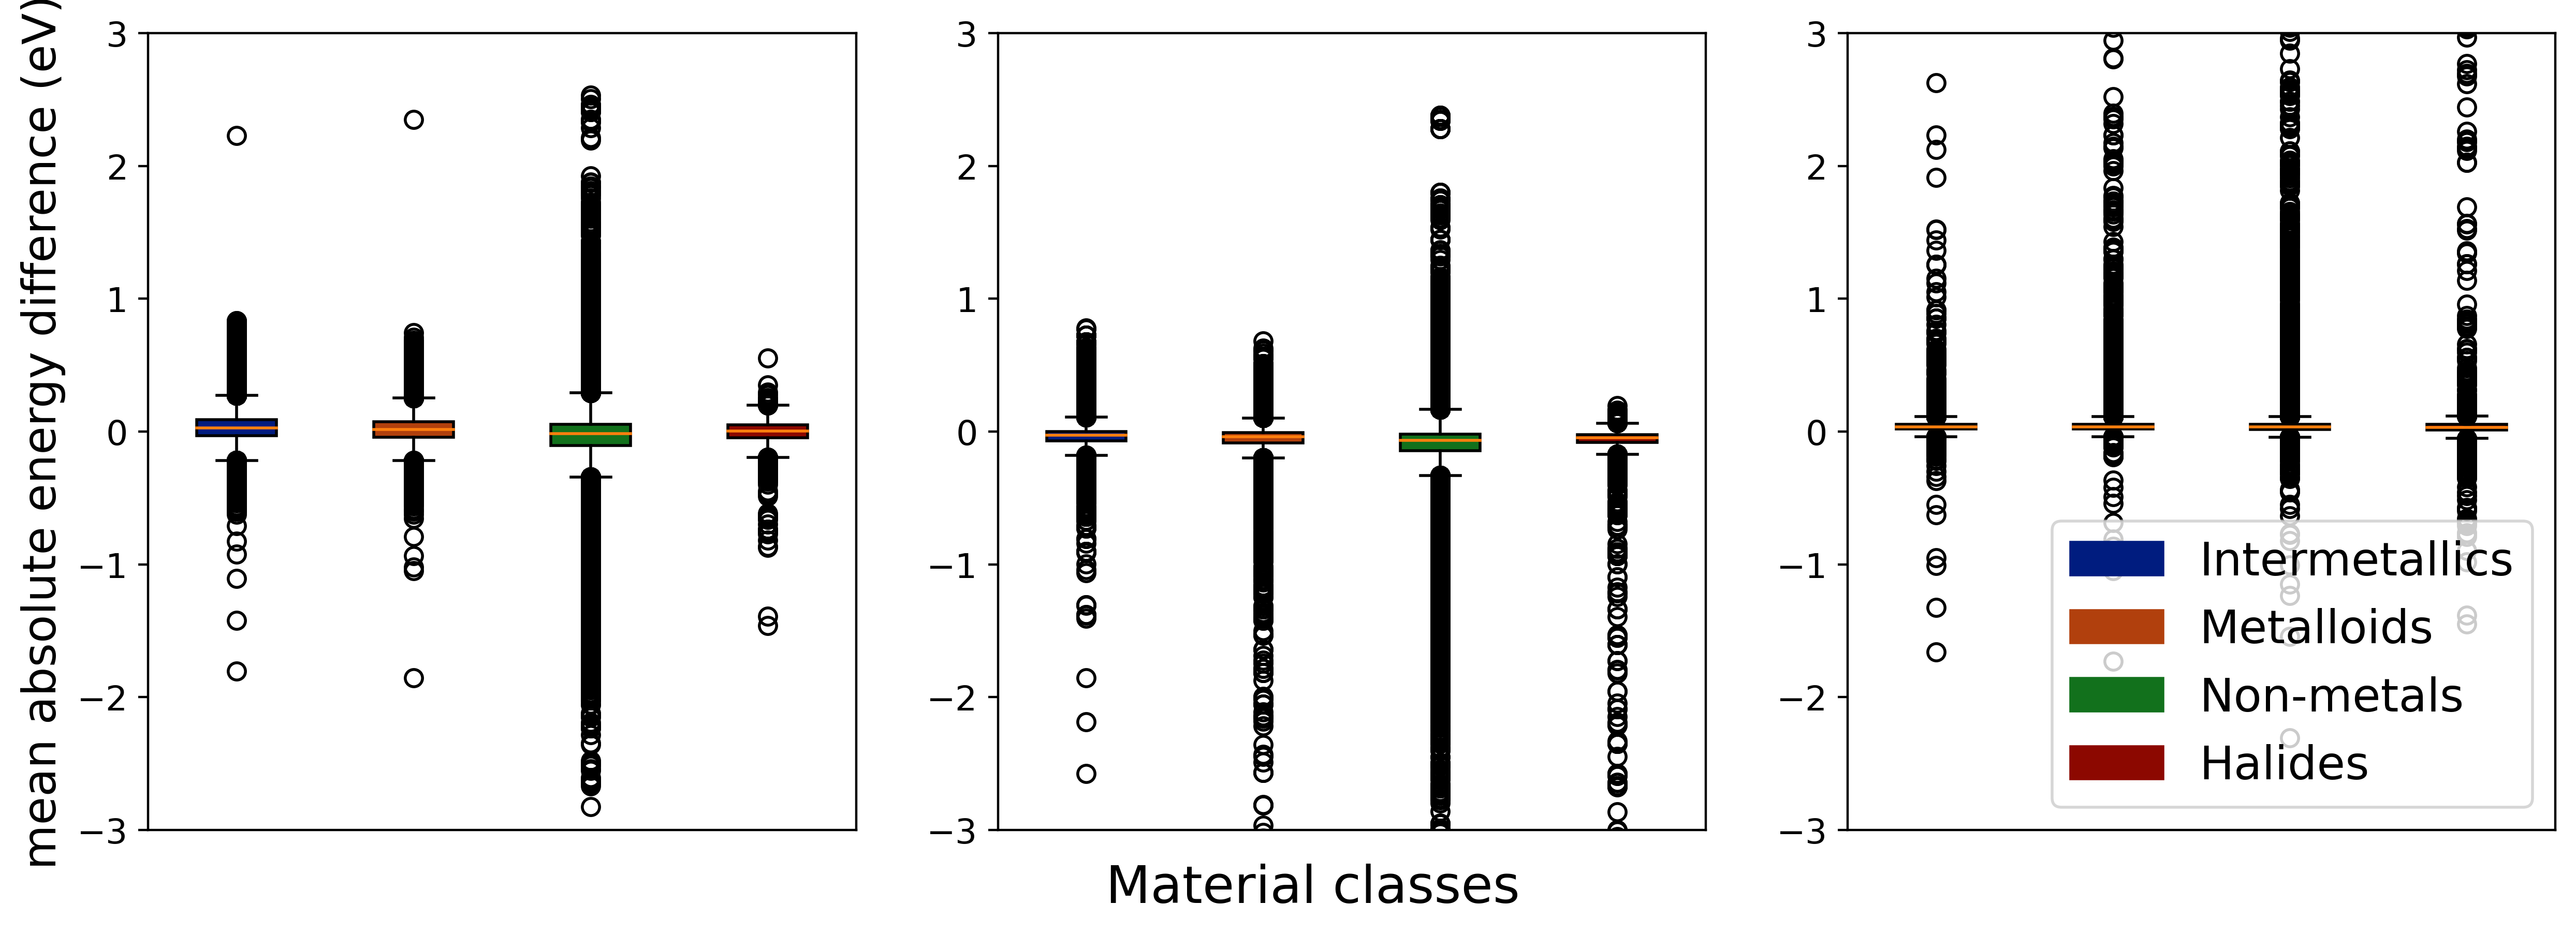

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, dpi=400)

colors = {'Intermetallics': '#001c7f', 'Metalloids': '#b1400d', 'Non-metals':  '#12711c', 'Halides': '#8c0800'}

for ax, energy_maes in zip([ax1, ax2, ax3], [total_energy_maes, slab_energy_maes, ref_energy_maes]):
    data = [energy_maes[key] for key in energy_maes.keys()]
    box = ax.boxplot(data, patch_artist=True)
    for patch, color in zip(box['boxes'], [colors[category] for category in energy_maes.keys()]):
        patch.set_facecolor(color)


for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_ylim(-3,3)

ax1.set_ylabel("mean absolute energy difference (eV)", fontsize=16)

# Create custom legend
legend_colors = [plt.Rectangle((0, 0), 1, 1, color=colors[key]) for key in total_energy_maes.keys()]
plt.legend(legend_colors, total_energy_maes.keys(), loc='lower right', fontsize=16)
fig.text(0.5, 0.04, 'Material classes', ha='center', fontsize=18)

plt.show()


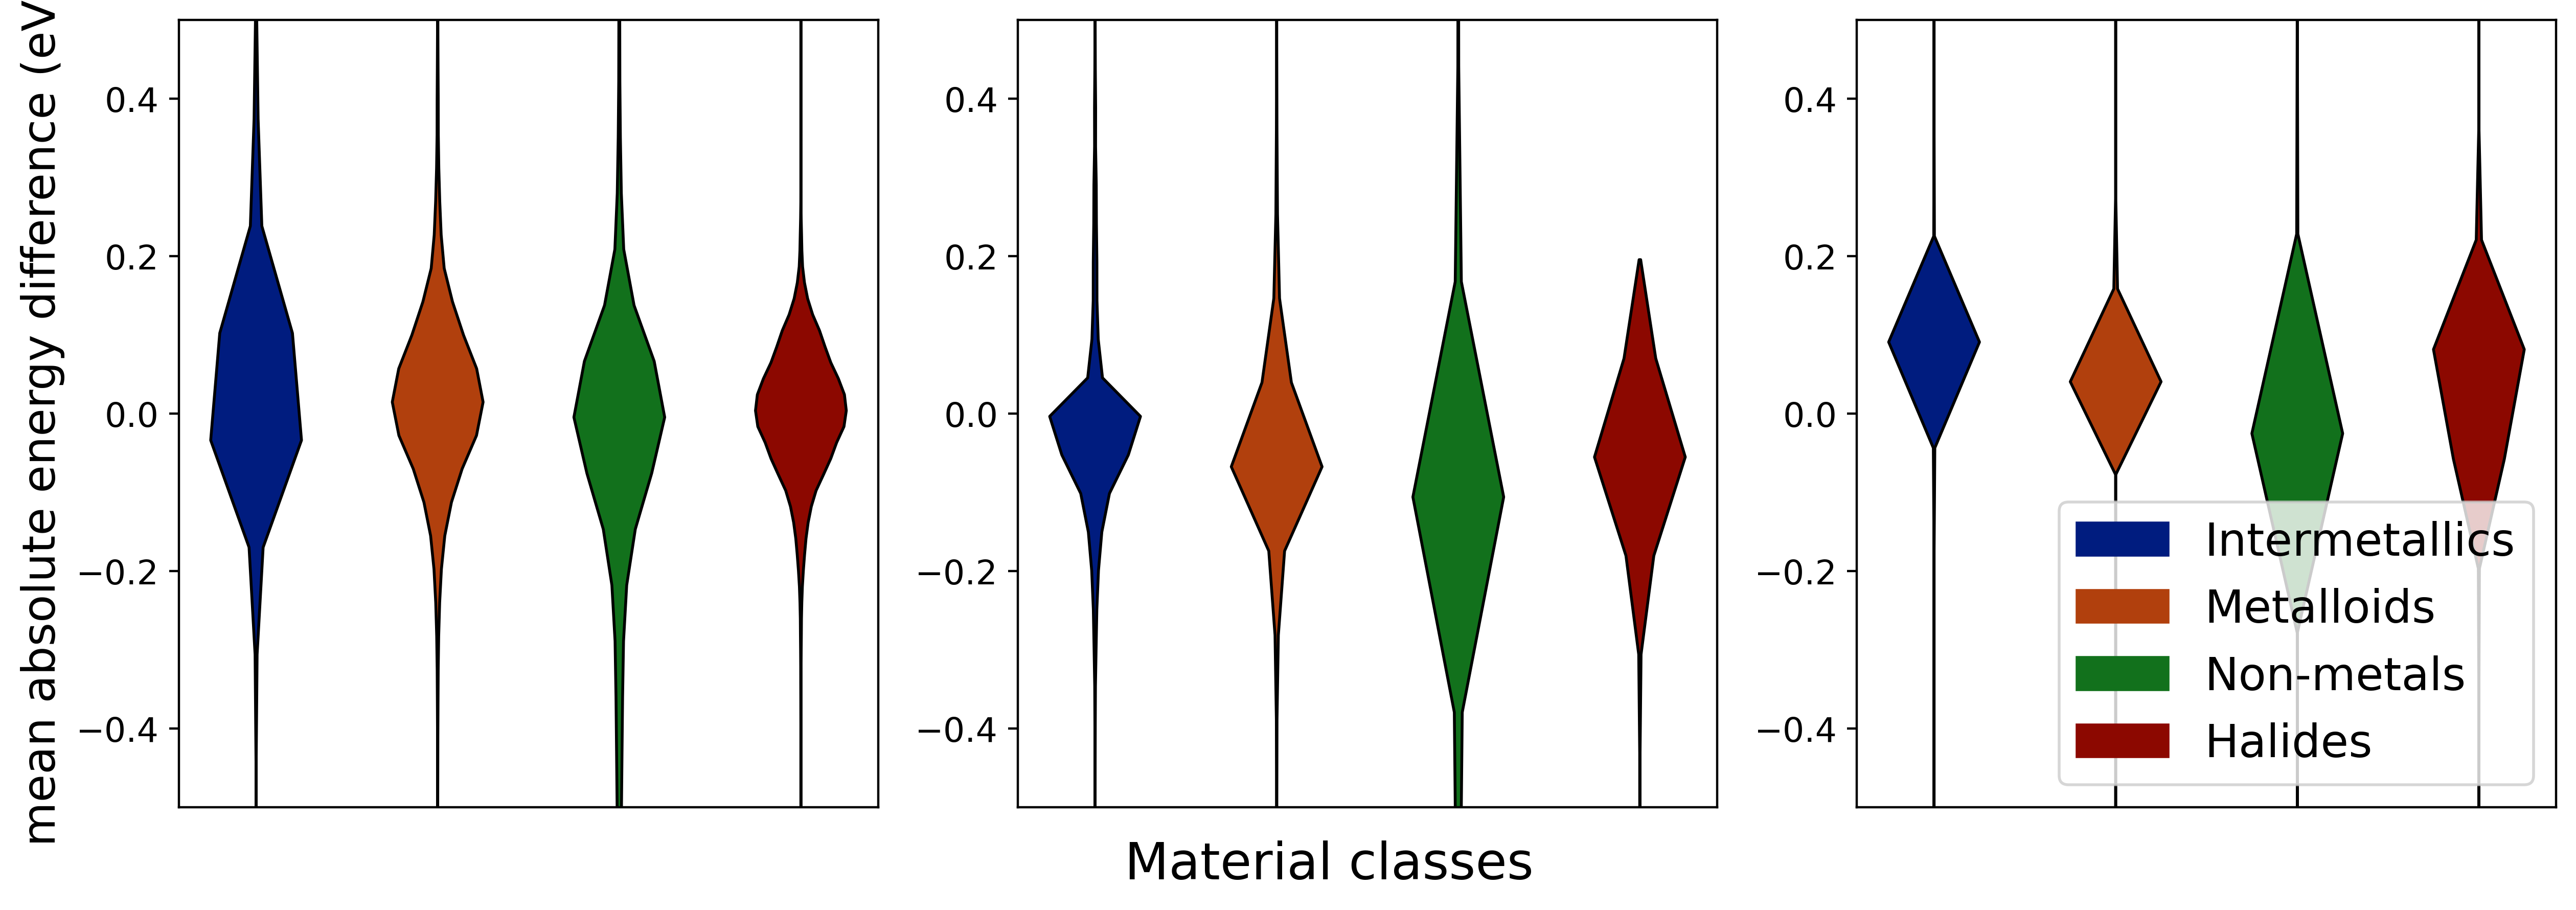

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, dpi=400)

colors = {'Intermetallics': '#001c7f', 'Metalloids': '#b1400d', 'Non-metals':  '#12711c', 'Halides': '#8c0800'}

for ax, energy_maes in zip([ax1, ax2, ax3], [total_energy_maes, slab_energy_maes, ref_energy_maes]):
    data = [energy_maes[key] for key in energy_maes.keys()]
    parts = ax.violinplot(data,  showmeans=False, showmedians=False, showextrema=False)
    for partname, part in parts.items():
        if partname == 'bodies':
            for pc, color in zip(part, [colors[category] for category in energy_maes.keys()]):
                pc.set_facecolor(color)
                pc.set_edgecolor('black')
                pc.set_alpha(1)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_ylim(-0.5,0.5)

ax1.set_ylabel("mean absolute energy difference (eV)", fontsize=16)

# Create custom legend
legend_colors = [plt.Rectangle((0, 0), 1, 1, color=colors[key]) for key in total_energy_maes.keys()]
plt.legend(legend_colors, total_energy_maes.keys(), loc='lower right', fontsize=16)
fig.text(0.5, 0.04, 'Material classes', ha='center', fontsize=18)

plt.show()